# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui
import scipy.stats as stats

# Importing, Prepping and Visualizing Data

# Inflation Data

In [2]:
# Import and clean Infaltion data
inflation_file = "Data/inflation_1810025601-noSymbol.csv"
inflation_df = pd.read_csv(inflation_file, encoding="utf-8")
inflation_df = inflation_df.rename(columns={"Reference period":'Year'})

# Summerize average inflation by year and drop unwanted rows and columns:
pivot = pd.pivot_table(inflation_df, values='Percent', index=inflation_df['Year'].str[-4:], aggfunc='mean')
pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022, 2023], inplace=True)
inflation_df_avg = pd.DataFrame(pivot)
inflation_df_avg = inflation_df_avg.reset_index()
inflation_df_avg.head(13)

,Year,Percent
0,2009,2.716667
1,2010,1.191667
2,2011,1.816667
3,2012,1.708333
4,2013,1.183333
5,2014,1.350000
6,2015,1.775000
7,2016,1.616667
8,2017,1.183333
9,2018,1.833333


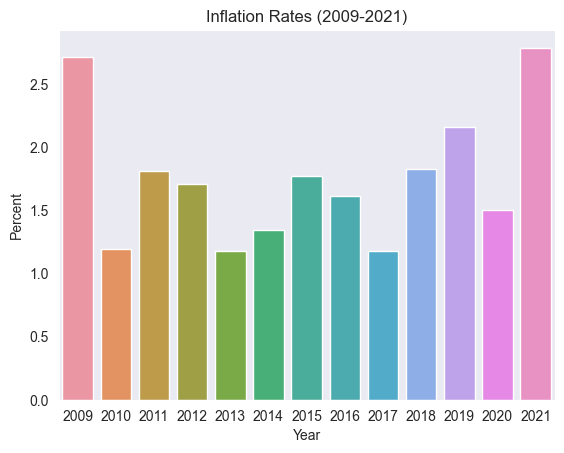

In [3]:
# plot Inflation Data

# create the bar plot
sns.set_style('dark')
ax = sns.barplot(x='Year', y='Percent', data=inflation_df_avg)

# set the plot title and axis labels
ax.set_title('Inflation Rates (2009-2021)')

plt.savefig("Inflation.png", dpi=300)

# Show the plot
plt.show()



# Household Spending

In [4]:
# Importing and cleaning HouseHold Spending Data
spending_file = "Data/spending2-3610012401-noSymbol.csv"
spending_df = pd.read_csv(spending_file, encoding="utf-8", on_bad_lines='skip')

# Create a new column 'Quarter' that contains the quarter of each year
spending_df['Quarter'] = spending_df['Year'].str[:2]
spending_df['Year'] = spending_df['Year'].str[3:]

# Summarize columns to match Payment Data
spending_df['Food and entertainment'] = spending_df[['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture']].sum(axis=1)
spending_df['Travel and Transport'] = spending_df[['Transport', 'Accommodation services']].sum(axis=1)

#Drop Combined columns 
spending_df.drop(columns=['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture', 'Transport', 'Accommodation services', 'Quarter' ], inplace=True)

# Rename columns for Asthetics on Graph
spending_df.rename(columns={"Furnishings, household equipment and other goods and services related to the dwelling and property": "Furniture", "Insurance and financial services" : "Insurance", "Miscellaneous goods and services": "Miscellaneous"}, inplace=True)


pivot = pd.pivot_table(spending_df, index=['Year'], 
                              values=['Clothing and footwear', 'Furniture', 'Health', 
                                      'Communications', 'Education', 'Insurance', 
                                      'Miscellaneous', 'Net expenditure abroad', 
                                      'Food and entertainment', 'Travel and Transport'], 
                              aggfunc='sum')

pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022,], inplace=True)

spending_df = pivot
spending_df.head(15)


,Clothing and footwear,Communications,Education,Food and entertainment,Furniture,Health,Insurance,Miscellaneous,Net expenditure abroad,Travel and Transport
Year,,,,,,,,,,
2009,36824,22550,12162,201481,51526,37537,74669,45872,13384,128185
2010,38478,23421,13169,207166,52702,39522,80704,47866,15290,140336
2011,39679,24744,14114,212421,53082,41070,84381,49873,16450,151259
2012,40632,25559,15140,217512,53600,42190,84478,51756,17392,158619
2013,42055,26839,16227,221896,54925,43764,88827,53371,17794,167301
2014,43974,28207,17184,229317,57214,45386,94556,55636,17629,176277
2015,46569,29520,18177,236696,59377,47520,98811,57757,17379,176516
2016,47270,30725,19261,242228,61778,49661,101962,59759,12631,182340
2017,48831,32825,20510,250565,64617,51921,107239,62452,11856,198974


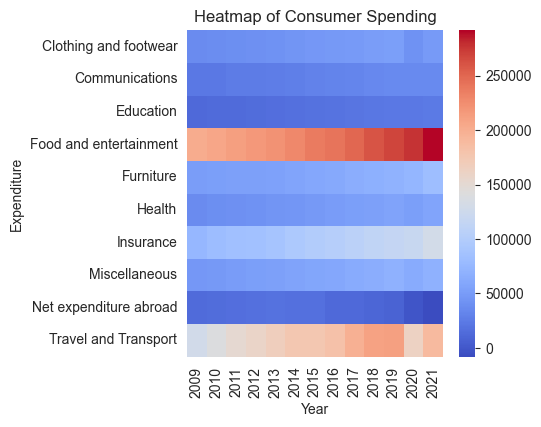

In [5]:
# Create heatmap using seaborn
# Transpose the DataFrame
spending_df_transpose = spending_df.transpose()

# Create heatmap using seaborn with transposed DataFrame
sns.heatmap(spending_df_transpose, cmap="coolwarm")

# Set plot title and axis labels
plt.title("Heatmap of Consumer Spending")
plt.xlabel("Year") # Switch x and y axis labels
plt.ylabel("Expenditure") # Switch x and y axis labels

#Adjust margins for clean saving
plt.subplots_adjust(left=0.4, bottom=0.2)

plt.savefig("spending_heat_map.png", dpi=300)

# Show the plot
plt.show()



# Merged Household Spending and Inflation

In [25]:
# Compare Inflation to  Spending 
merged_df = pd.merge(inflation_df_avg, spending_df, on='Year')
merged_df = merged_df.rename(columns={"Percent":'Inflation'})
merged_df = merged_df[['Year', 'Inflation', 
             'Clothing and footwear', 'Food and entertainment', 'Travel and Transport']]
merged_df.head(15)

,Year,Inflation,Clothing and footwear,Food and entertainment,Travel and Transport
0,2009,2.716667,36824,201481,128185
1,2010,1.191667,38478,207166,140336
2,2011,1.816667,39679,212421,151259
3,2012,1.708333,40632,217512,158619
4,2013,1.183333,42055,221896,167301
5,2014,1.350000,43974,229317,176277
6,2015,1.775000,46569,236696,176516
7,2016,1.616667,47270,242228,182340
8,2017,1.183333,48831,250565,198974
9,2018,1.833333,50576,260939,210226


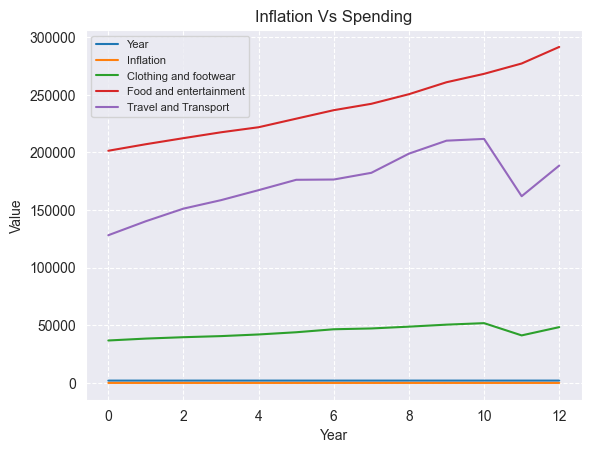

In [26]:
sns.set_style('dark')
merged_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Inflation Vs Spending")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=8, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("line_plot.png", dpi=300)

# Show Plot
plt.show()


# Liabilities 

In [12]:
# Import and clean Liabilities Data 
Liabilities_data_path = "CleanData/Liabilities.csv"
Liabilities_df = pd.read_csv(Liabilities_data_path)
Liabilities_df = Liabilities_df.rename(columns={"REF_DATE": "Year", "VALUE": "Amount", "Credit liabilities of households": "Credit_Liabilities"})

# Summerrize data by year
Liabilities_df = Liabilities_df[['Year', 'Credit_Liabilities', 'Amount']]
Liabilities_df['Year'] = pd.to_datetime(Liabilities_df['Year']).dt.year
pivot_table = pd.pivot_table(Liabilities_df, values='Amount', index='Year', columns=['Credit_Liabilities'], aggfunc=np.sum)

#Extracting columns for Chart
Liabilities_summary_df = pivot_table[['Credit cards', 'Financial vehicle corporations engaged in securitization', 
             'Lines of credit, of which: excluding home equity lines of credit', 'Personal loans']]
Liabilities_summary_df = Liabilities_summary_df.rename(columns={'Financial vehicle corporations engaged in securitization': 'Vehicle', 'Lines of credit, of which: excluding home equity lines of credit': 'LOC'})


Liabilities_summary_df 

Credit_Liabilities,Credit cards,Vehicle,LOC,Personal loans
Year,,,,
2009,648132,4002081,569178,648396
2010,682701,4176589,640976,705839
2011,799031,3010592,689859,788553
2012,921374,366716,669435,871156
2013,880984,404306,707776,1045148
2014,895696,387754,732903,1134831
2015,923048,388486,809070,1142789
2016,951960,410667,837852,1181341
2017,984283,404088,856656,1212220


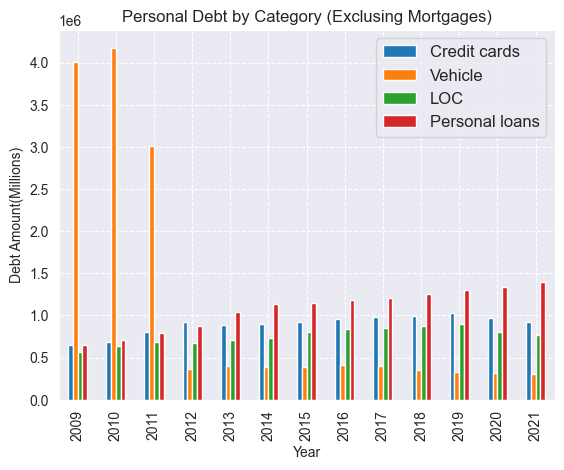

In [13]:
# plot Payment Data 
sns.set_style('dark')
Liabilities_summary_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Debt Amount(Millions)")
plt.title("Personal Debt by Category (Exclusing Mortgages)")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("Liabilities_plot.png", dpi=300)

# Show Plot
plt.show()

# Payment Method Data

In [14]:
# Import and clean Payment Data 
payment_data_path = "CleanData/MethodofPayment.csv"
PaymentMethod_df = pd.read_csv(payment_data_path)
PaymentMethod_df = PaymentMethod_df.rename(columns={"Debit Card": "Debit", "Credit Card": "Credit"})

# Summerrize data by year
pivot_table = pd.pivot_table(PaymentMethod_df, index=["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
sum_Payment_df = pivot_table
sum_Payment_df.head()

,Cash,Credit,Debit,Other
Year,,,,
2009,233.4,447.6,267.2,51.8
2013,216.1,491.5,209.3,83.1
2017,154.7,614.0,193.1,38.2
2021,103.1,623.2,183.3,90.4


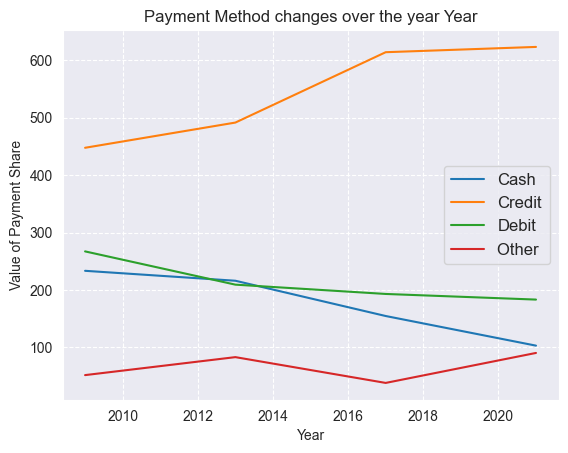

In [15]:
# plot Payment Data 
sns.set_style('dark')
sum_Payment_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Value of Payment Share")
plt.title("Payment Method changes over the year Year")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("line_plot.png", dpi=300)

# Show Plot
plt.show()


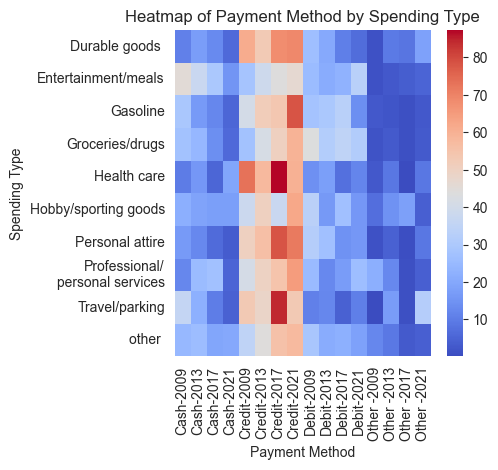

In [16]:
# Create pivot table
spending_pivot = pd.pivot_table(PaymentMethod_df, index=["Spending Type"], columns= ["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
spendingByType_df = spending_pivot
# Create heatmap using seaborn
sns.heatmap(spendingByType_df, cmap="coolwarm")

# Set plot title and axis labels
plt.title("Heatmap of Payment Method by Spending Type")
plt.xlabel("Payment Method")
plt.ylabel("Spending Type")

#Adjust margins for clean saving
plt.subplots_adjust(left=0.4, bottom=0.2)

plt.savefig("heat_map.png", dpi=300)

# Show the plot
plt.show()
